<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2015-1</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Rodrigo Vega Vilchis
### Joel Gómez Uribe
---

<h2 align="center">Tarea-Práctica 3: Gráficas en Python</h2> 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt

plt.rcParams.update({
    "text.usetex": True,
})

<h2>Gráficas de datos experimentales</h3>

In [2]:
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [13]:
data = loadtxt("manchasolares.txt") # Guarda los valores de manchasolares.txt
meses = data[:,0]
n_manchas = data[:, 1]

<div class="alert alert-block alert-warning">
    <strong>Pendiente</strong><br>
    Arreglar el problema de las etiquetas del eje x
</div>

Escribe un programa que lea los datos y haga una gráfica de las manchas solares en función del tiempo.

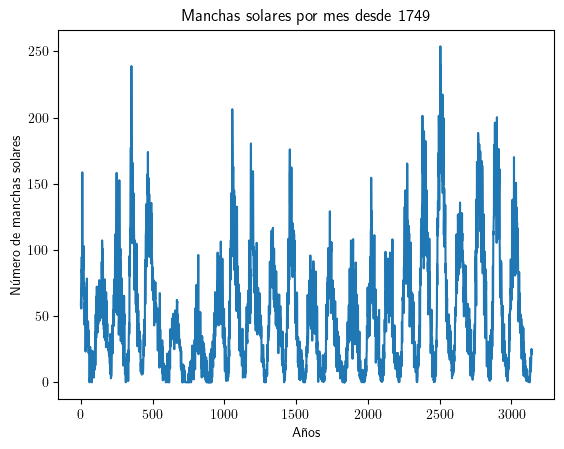

In [10]:
plt.plot(meses, n_manchas)
plt.xlabel("Años")
plt.ylabel("Número de manchas solares")
plt.title("Manchas solares por mes desde 1749")
plt.show()

Modifica tu programa para mostrar solo los primeros 1000 datos (experimentales) en la gráfica.

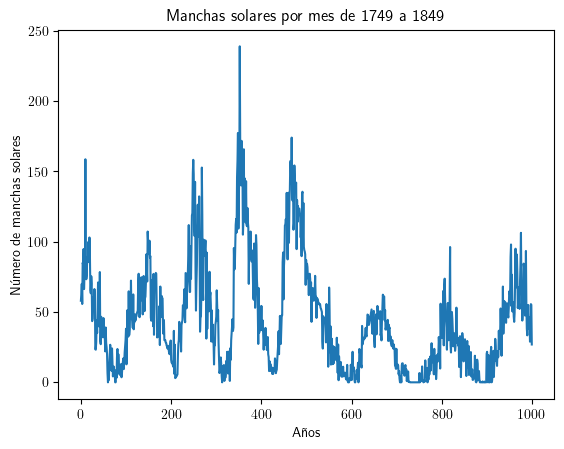

In [91]:
meses_1000 = meses[0:1000]
n_manchas_1000 = n_manchas[0:1000]
plt.plot(meses_1000, n_manchas_1000)
plt.xlabel("Años")
plt.ylabel("Número de manchas solares")
plt.title("Manchas solares por mes de 1749 a 1849")
plt.show()

Modifica nuevamente tu programa para calcular y graficar la <em>media (promedio) móvil</em> de los datos, definida por

\begin{equation*}
    Y_{k} = \dfrac{1}{2r + 1}\sum\limits_{m = -r}^{r} y_{k + m},
\end{equation*}

donde $r = 5$ (en este aso) y $y_{k}$ son los números de manchas solares.  

El programa debe graficar tanto los datos originales como la <em>media móvil</em> en el mismo gráfico, solo sobre los primeros mil datos.

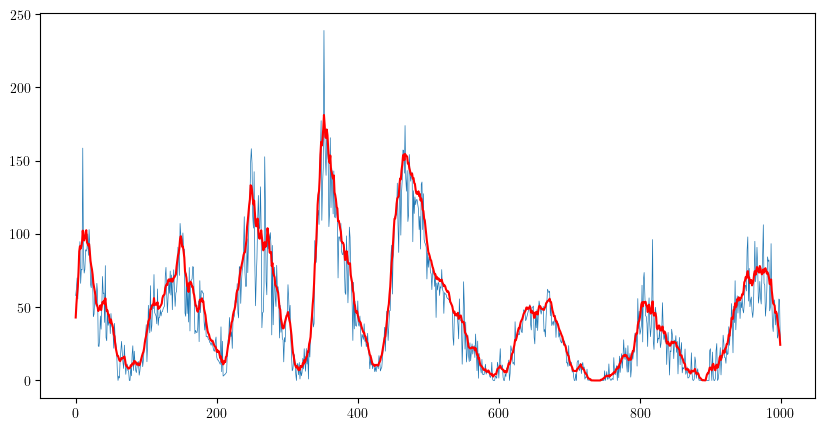

In [104]:
media_movil_manchas = np.zeros(len(meses_1000))
r = 5
mult = 1 / (2*r + 1)

for mes in range(len(meses_1000)):
    media_movil_manchas[mes] = n_manchas_1000[mes]
    for i in range(-r, r + 1):
        if 0 <= mes + i < len(meses_1000):
            media_movil_manchas[mes] += n_manchas_1000[mes + i]
    
    media_movil_manchas[mes] *= mult
    
fig = plt.figure(figsize=(10, 5))   
plt.plot(meses_1000,n_manchas_1000,lw=0.5)
plt.plot(meses_1000,media_movil_manchas, 'r')
plt.show()

<h2>Gráfica de curvas</h2>

Grafica la llamada curva <em>deltoide</em>, definida paramétricamente por las ecuaciones:

\begin{equation*}
    x = 2\cos\theta + \cos 2\theta,\qquad y = 2\sin\theta - \sin 2\theta,
\end{equation*}

donde $0 \leq \theta \leq 2\pi$.

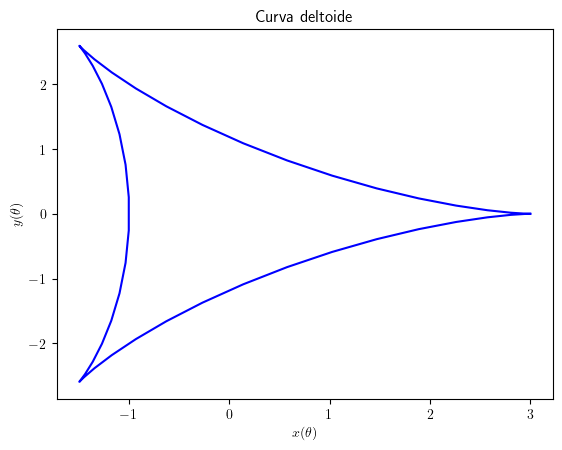

In [106]:
theta = np.linspace(0, 2*np.pi)
x = 2*np.cos(theta) + np.cos(2 * theta)
y = 2*np.sin(theta) - np.sin(2 * theta)

plt.plot(x, y, 'b')
plt.title("Curva deltoide")
plt.xlabel(r"$x(\theta)$")
plt.ylabel(r"$y(\theta)$")
plt.show()

Usando este mismo enfoque, se puede hacer una gráfica polar $r = f(\theta)$ para alguna función $f$ calculando el rango $r$ para un rango de valores de $\theta$ y luego convirtiendo $r$ y $\theta$ a coordenadas cartesiana usando las ecuaciones estándar:

\begin{equation*}
    x = r\cos\theta\qquad y = r\sin\theta
\end{equation*}

Utiliza este método para trazar la <em>espiral galileana</em> $r = \theta^{2}$ para $0 \leq \theta \leq 10\pi$.

In [113]:
theta = np.linspace(0, 10 * np.pi, 10000)
r = theta ** 2


def polar_cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    return x,y

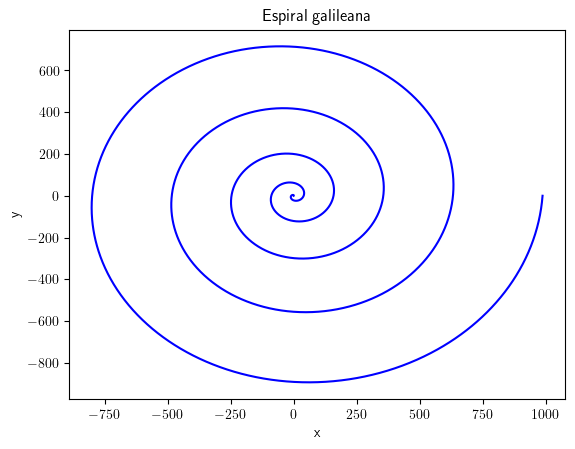

In [114]:
x,y = polar_cart(r, theta)
plt.plot(x, y, 'b')
plt.title("Espiral galileana")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Con el mismo método, haz una gráfica polar de la "función de Fey":

In [115]:
theta = np.linspace(0, 24 * np.pi, 100000)
r = np.exp(np.cos(theta)) - 2 * np.cos(4 * theta) + (np.sin(theta / 12))**5

x,y = polar_cart(r, theta)

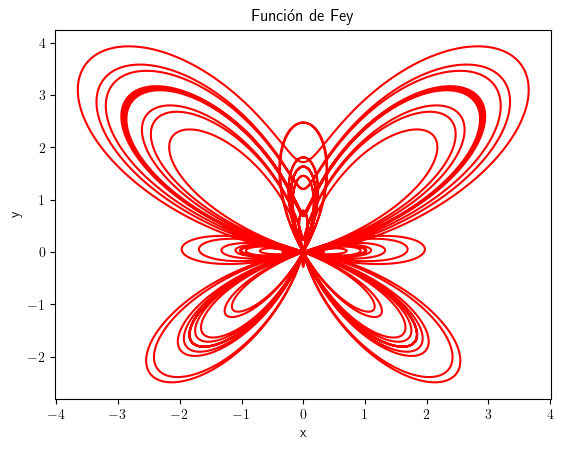

In [117]:
plt.plot(y, x, 'r')
plt.title("Función de Fey")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

<h2>Caminatas aleatorias</h2>

Escribe un programa que simule una caminata aleatoria para $N$ passos y haz una gráfica de las posiciones de la caminata vs el tiempo. Asimismo, grafica un histograma de al afrecuencia de dichas posiciones. Puedes considera $l = 1$, para simplificar las cosas.

Convierte tu programa del ejercicion anterior n un afunción y usala para genera 100 caminatas aleatorias y haz una sola gráfica de las poisiciones de todas las caminatas vs el tiempo $t$. Asimismo, grafica un único histograma de la frecuencia de las posiciones, de todas las caminatas. <strong>¿Qué es lo que observas?¿cuál es la diferencia con lo que obtuviste en el ejercicio anterior?</strong>

Generaliza tu programa para crear una función para simular una (o varias caminatas) aleatorias en 2D y 3D, y usala para graficas las posiciones $(x,y)$ o $(x,y,z)$ de una o varias caminatas.

<h2>La gráfica de Feigenbaum (caos determinista)</h2>

Apoyate en el programa que vimos en clase y <strong>escribe un programa que muestre el comportamiento del mapeo logístico</strong> mediante una gráfica.

De acuerdo a tu gráfica, ¿a qué valor de $r$ el sitema pasa de un comportamiento ordenado (puntos fijos o ciclos límite) a un comportamiento caótico? Aeste punto a veces se le llama "el borde del caos".

**Hint**: Esto es lo que debe hacer el programa:
Para un valor dado de $r$, comienza con $x_{n} = \tfrac{1}{2}$ e itera la ecuación del mapeo logístico mil veces Eso le dará la opurtunidad de establecerse en un punto fijo o en una órbita de algún periodo. Luego ejectua otras mil iteraciones y grafica los puntos $(r, x_{\infty})$ en una gráfica donde el eje horizontal es $r$ y el eje vertical es $x_{\infty}$. Repite todo el cálculo para valores de $r$ de 1 a 4 pasos de 0.01, graficando los puntos para todos los valores de $r$ en la misma figura. Tu programa debería generar la distintiva gráfica que para un árbol inclinado hacia un lado. ESta famosa imagen se llama <em>Gráfica de Feigenbaum</em>.

**Opcional (para 1.5 pts extra)**: Hay otra forma para calcular el diagrama de Feigenbaum, que puede ser más claro y rápido, dado que hace uso de la capacidad de Python para realizar aritmética con arreglos completos. Crear un arreglo $r$ que contenga cada valor distinto de $r$, ``[1.0, 1.01, 1.02, ...]``. Crea otro arreglo ``x`` del mismo tamaño para guardar los valores orrespondientes de $x$, establecidos inicialmente en 0.5; fimalmente realiza una iteración del mapeo logístico para todos los valores de $r$ a la vez, con una sola instrucción de la forma ``x = r*x*(1 - x)`` y comparala con tu programa anterior.

<h2>El conjunto de Mandelbrot</h2>

**Escribe un programa para crear una imagen del conjunto de Mandelbrot** realizando la iteración para todos los valores de $c = x + iy$ en una cuadrícula de $N \times N$ que abarque la región donde $-2 \leq x \leq 2$ y $-2 \leq y \leq 2$. Haz una gráfica de densidad (_density plot_) en el que los puntos de la cuadrícula dentro del conjunto de Mandelbrot estén coloreados en negro y los de afuera estén coloreados en blanco.  

**Sugerencia**: Probablemente te resulte útil comenzar con una cuadrícula muy simple, es decri, con un valor pequeño de $N$ (quizás $N = 100$) para que tu programa se ejecute rápidamente mientras lo pruebas. Una vez que te asegures de que funciona correctamente, aumenta el valor de $N$ para producir una imagen final de alta calidad de la forma del conjunto.

**Opcional (para 1.5 pts extra)**: Puedes programar otra variante del mismo ejercicio que puede producir imágenes sorprendentes. En lugar de colorear los puntos solo en blanco o negro, colorea los puntos de acuerdo con el número de iteraciones de la ecuación antes de $|z_{n}|$ sea mayor que 2 (o bien el número máximo de iteraciones si es que $|z_{n}|$ nunca llega a ser mayor que 2). Si usas alguno de los esquemas más coloridos que Python proporciona para las gráficas de densidad, como ``hot`` o ``jet``, puedes crear algunas imágenes espectaculares. Otra variante interesante es colorear según el logaritmo del número de iteraciones, lo que ayuda a revelar parte de la estructura más fina fuera del conjunto.